In [400]:
import sympy as smp
from sympy import *
import numpy as np
from numpy import *
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from fractions import Fraction
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

x, y, t, n, a, b, C, c, r, u, s, A, i, j, k = smp.symbols('x y t n a b C c r u s A i j k')
f, g, m = smp.symbols('f g m', cls=smp.Function)

# 1

The position of a particle in the xy-plane at time t is r(t)  = (t+3)i + (t^2 + 1)j

Find an equation in x and y whose graph is the path of the particle. 

Then find the particle's velocity and acceleration vectors at t = 4

In [390]:
from sympy import symbols, diff
from sympy.vector import CoordSys3D

# Define the 3D coordinate system
N = CoordSys3D('N')

# Define the position vector r(t)
r = (t + 3)*N.i + (t**2 + 1)*N.j

# Calculate the derivative of r(t) to get the velocity
v = diff(r, t)

# Calculate the derivative of v(t) to get the acceleration
a = diff(v, t)

# Substitute t = 4 into the velocity and acceleration
v_at_4 = v.subs(t, 4)
a_at_4 = a.subs(t, 4)

print("Velocity at t=4:")
display(v_at_4)
print("Acceleration at t=4:")
display(a_at_4)

Velocity at t=4:


N.i + 8*N.j

Acceleration at t=4:


2*N.j

# 2

The path r(t) = (t)i + (4t^2 + 3)j describes motion on the parabola y = 4x^2 + 3

Find the particle's velocity and acceleration vectors at t = 5, and sketch them as vectors on the curve.

In [401]:
from sympy import symbols, diff
from sympy.vector import CoordSys3D
# Define the 3D coordinate system
N = CoordSys3D('N')

# Define the position vector r(t)
r = t*N.i + (4*t**2 + 3)*N.j

# Calculate the derivative of r(t) to get the velocity
v = diff(r, t)

# Calculate the derivative of v(t) to get the acceleration
a = diff(v, t)

# Substitute t = 5 into the velocity and acceleration
v_at_5 = v.subs(t, 5)
a_at_5 = a.subs(t, 5)

print("Velocity at t=5:")
display(v_at_5)
print("Acceleration at t=5:")
display(a_at_5)

Velocity at t=5:


N.i + 40*N.j

Acceleration at t=5:


8*N.j

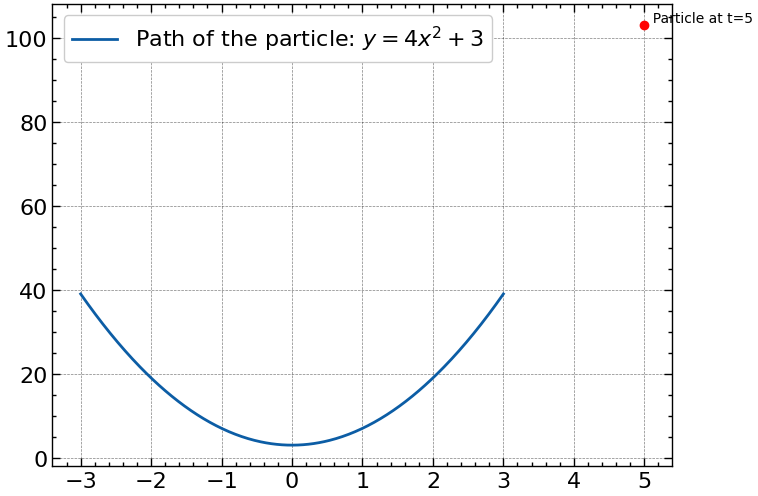

In [398]:
# Define the function for the path of the particle
def path(x):
    return 4*x**2 + 3

# Generate x values
x = np.linspace(-3, 3, 400)

# Generate y values
y = path(x)

# Plot the path of the particle
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Path of the particle: $y = 4x^2 + 3$')

# Mark the position of the particle at t=5
t = 5
x_t = t
y_t = path(x_t)
plt.plot(x_t, y_t, 'ro')  # 'ro' means red color, circle marker
plt.text(x_t, y_t, '  Particle at t=5', verticalalignment='bottom')

# Add a legend
plt.legend()

# Display the plot
plt.show()

# 3

Find parametric equations for the line that is tangent to the given curve at the given parameter value:

r(t) = (4t^2)i + (4t + 1)j + (3t^3)k

t = t_0 = 5

Find the standard parameterization for the tangent line:

x, y, and z = ?

In [404]:
from sympy import symbols, diff
from sympy.vector import CoordSys3D
# Define the 3D coordinate system
N = CoordSys3D('N')

# Define the position vector r(t)
r = 4*t**2*N.i + (4*t + 1)*N.j + 3*t**3*N.k

# Calculate the derivative of r(t) to get the velocity
v = diff(r, t)

# Substitute t = 5 into the position and velocity
r_at_5 = r.subs(t, 5)
v_at_5 = v.subs(t, 5)


# ANSWER:
# x = 100 + 40t
# y = 21 + 4t
# z = 375 + 225t

print("Position at t=5:")
display(r_at_5)
print("Velocity at t=5:")
display(v_at_5)

Position at t=5:


100*N.i + 21*N.j + 375*N.k

Velocity at t=5:


40*N.i + 4*N.j + 225*N.k

# 4

The tangent line to a smooth curve r(t) = f(t)i + g(t)j + h(t)k at t = t_0 is the line that passes through the point (f(t_0), g(t_0), h(t_0)) parallel to v(t_0), the curve's velocity vector at t_0. 

Find the parametric equations for the line that is tangent to the given curve at the given parameter value t = t_0

r(t) = (sin(t))i + (cos(t))j + (sin(6t))k, t_0 = pi/2

In [407]:
from sympy import symbols, cos, sin, diff, pi
from sympy.vector import CoordSys3D

# Define the 3D coordinate system
N = CoordSys3D('N')

# Define the position vector r(t)
r = sin(t)*N.i + cos(t)*N.j + sin(6*t)*N.k

# Calculate the derivative of r(t) to get the velocity
v = diff(r, t)

# Substitute t = pi/2 into the position and velocity
r_at_pi_over_2 = r.subs(t, pi/2)
v_at_pi_over_2 = v.subs(t, pi/2)

# Define the symbol s for the parameter of the tangent line
s = symbols('s')

# Find the parametric equations for the tangent line
tangent_line = r_at_pi_over_2 + s*v_at_pi_over_2

# Extract the x, y, and z components of the tangent line
x = tangent_line.dot(N.i)
y = tangent_line.dot(N.j)
z = tangent_line.dot(N.k)

print(f"x = {x}")
print(f"y = {y}")
print(f"z = {z}")

x = 1
y = -s
z = -6*s


# 5 - 1

Show that the vector-valued function shown below describes the motion of a particle moving in a circle of radius 1 centered at the point (2, 5, 1) and lying in the plane 3x + 3y - 6z = 15

r(t) = (2i + 5j + k) + smp.cos(t*((1/sqrt(2))*i + (1/sqrt(2))*j)) + smp.sin(t*((1/sqrt(3)*i + (1/sqrt(3))*j) + (1/sqrt(3))*k))

In [57]:
# I
# Parametric equations for x, y, and z

from sympy.vector import CoordSys3D

# Define the coordinate system
N = CoordSys3D('N')

# Define the vector-valued function
r = (2*N.i + 5*N.j + N.k) + smp.cos(t)*((1/smp.sqrt(2))*N.i + (1/smp.sqrt(2))*N.j) + smp.sin(t)*((1/smp.sqrt(3))*N.i + (1/smp.sqrt(3))*N.j + (1/smp.sqrt(3))*N.k)

# Extract the parametric equations
x = r.dot(N.i)
y = r.dot(N.j)
z = r.dot(N.k)

# Print the parametric equations
print("x:")
display(x)

print("y:")
display(y)

print("z:")
display(z)

x:


sqrt(3)*sin(t)/3 + sqrt(2)*cos(t)/2 + 2

y:


sqrt(3)*sin(t)/3 + sqrt(2)*cos(t)/2 + 5

z:


sqrt(3)*sin(t)/3 + 1

In [68]:
# II
# Subract the constant from both sides and square both sides of each parametric equation

# Define the parametric equations
x = 2 + smp.cos(t)/smp.sqrt(2) + smp.sin(t)/smp.sqrt(3)
y = 5 - smp.cos(t)/smp.sqrt(2) + smp.sin(t)/smp.sqrt(3)
z = 1 + smp.sin(t)/smp.sqrt(3)

# Subtract the constant from both sides and square both sides
x_eq = (x - 2)**2
y_eq = (y - 5)**2
z_eq = (z - 1)**2

# Print the equations
print("(x - 2)^2:")
display(x_eq.expand())

print("(y - 5)^2:")
display(y_eq.expand())

print("(z - 1)^2:")
display(z_eq.expand())

(x - 2)^2:


sin(t)**2/3 + sqrt(6)*sin(t)*cos(t)/3 + cos(t)**2/2

(y - 5)^2:


sin(t)**2/3 - sqrt(6)*sin(t)*cos(t)/3 + cos(t)**2/2

(z - 1)^2:


sin(t)**2/3

In [72]:
# III
# Add the resulting left sides and resulting right sides of each parametric equation

(x_eq + y_eq + z_eq).simplify()

# Therefore, the particle lies on a sphere of radius 1 centered at (2, 5, 1), since the equation of a sphere with radius A centered at:
# (x0, y0, z0) is (x - x0)^2 + (y - y0)^2 + (z - z0)^2 = A^2

# Thus, the plane passes through the center of the sphere

1

In [74]:
# IV
# Substitute the three parametric expressions found for x, y, and z into the equation of the plane

# Define the plane equation
plane_eq = 3*x + 3*y - 6*z

# Define the center point
center_point = (2, 5, 1)

# Substitute the center point into the plane equation
substituted_eq = plane_eq.subs({x: center_point[0], y: center_point[1], z: center_point[2]})

# Print the substituted equation
print(f"Substituted equation: {substituted_eq} = 15")

Substituted equation: 15 = 15


# 5 - 2

Show that the vector-valued function shown below describes the motion of a particle moving in a circle of radius 1 centered at the point (2, 3, 4) and lying in the plane 3x + 3y - 6z = -9

r(t) = (2i + 3j + 4k) + smp.cos(t*((1/sqrt(2))*i - (1/sqrt(2))*j)) + smp.sin(t*((1/sqrt(3)*i + (1/sqrt(3))*j) + (1/sqrt(3))*k))

In [75]:
# I
# Parametric equations for x, y, and z

from sympy.vector import CoordSys3D

# Define the coordinate system
N = CoordSys3D('N')

# Define the vector-valued function
r = (2*N.i + 3*N.j + 4*N.k) + smp.cos(t)*((1/smp.sqrt(2))*N.i - (1/smp.sqrt(2))*N.j) + smp.sin(t)*((1/smp.sqrt(3))*N.i + (1/smp.sqrt(3))*N.j + (1/smp.sqrt(3))*N.k)

# Extract the parametric equations
x = r.dot(N.i)
y = r.dot(N.j)
z = r.dot(N.k)

# Print the parametric equations
print("x:")
display(x)

print("y:")
display(y)

print("z:")
display(z)

x:


sqrt(3)*sin(t)/3 + sqrt(2)*cos(t)/2 + 2

y:


sqrt(3)*sin(t)/3 - sqrt(2)*cos(t)/2 + 3

z:


sqrt(3)*sin(t)/3 + 4

In [81]:
# II
# Subract the constant from both sides and square both sides of each parametric equation

# Define the parametric equations
x = ((smp.sqrt(3)*smp.sin(t))/3) + ((smp.sqrt(2)*smp.cos(t))/2) + 2
y = ((smp.sqrt(3)*smp.sin(t))/3) - ((smp.sqrt(2)*smp.cos(t))/2) + 3
z = ((smp.sqrt(3)*smp.sin(t))/3) + 4

# Subtract the constant from both sides and square both sides
x_eq = (x - 2)**2
y_eq = (y - 3)**2
z_eq = (z - 4)**2

# Print the equations
print("(x - 2)^2:")
display(x_eq.expand())

print("(y - 3)^2:")
display(y_eq.expand())

print("(z - 4)^2:")
display(z_eq.expand())

(x - 2)^2:


sin(t)**2/3 + sqrt(6)*sin(t)*cos(t)/3 + cos(t)**2/2

(y - 3)^2:


sin(t)**2/3 - sqrt(6)*sin(t)*cos(t)/3 + cos(t)**2/2

(z - 4)^2:


sin(t)**2/3

In [82]:
# III
# Add the resulting left sides and resulting right sides of each parametric equation

(x_eq + y_eq + z_eq).simplify()

# Therefore, the particle lies on a sphere of radius 1 centered at (2, 3, 4), since the equation of a sphere with radius A centered at:
# (x0, y0, z0) is (x - x0)^2 + (y - y0)^2 + (z - z0)^2 = A^2

# Thus, the plane passes through the center of the sphere

1

In [83]:
# IV
# Substitute the three parametric expressions found for x, y, and z into the equation of the plane

# Define the plane equation
plane_eq = 3*x + 3*y - 6*z

# Define the center point
center_point = (2, 3, 4)

# Substitute the center point into the plane equation
substituted_eq = plane_eq.subs({x: center_point[0], y: center_point[1], z: center_point[2]})

# Print the substituted equation
print(f"Substituted equation: {substituted_eq} = -9")

Substituted equation: -9 = -9


# 6

Evaluate the integral ∫(0, 1) [(4te^4t^2)i + (2e^-7t)j + (8)k]dt

In [412]:
from sympy.vector import CoordSys3D
# Define the coordinate system
N = CoordSys3D('N')

smp.integrate((4*t*smp.exp(4*t**2)*N.i) + (2*smp.exp(-7*t)*N.j) + (8)*N.k, (t, 0, 1)).doit().simplify()

(-1/2 + exp(4)/2)*N.i + (2/7 - 2*exp(-7)/7)*N.j + 8*N.k

# 7

A projectile is fired with an initial speed of 500 m/sec at an angle of elevation of 60 degrees. 

A: When will the projectile strike?

B: How far away will the projectile strike?

C: How high overhead will the projectile be when it is 5km downrange?

D: What is the greatest height reached by the projectile?

In [88]:
# A

# Time of flightt T = (2*v0*sin(theta))/g
# v0 = initial speed
# angle = theta
# acceleration of gravity = 9.8 (or 9.81)

# Define the variables
v0 = 500  # initial speed in m/s
theta = smp.rad(60)  # convert angle to radians
g = 9.8  # acceleration due to gravity in m/s²

# Calculate the time of flight
T = (2*v0*smp.sin(theta))/g

# Print the time of flight
print(f"The projectile will strike after {T.evalf()} seconds.")

The projectile will strike after 88.3699391616774 seconds.


In [89]:
# B

# Range R = (v0**2*smp.sin(2*theta))/g
# v0 = initial speed
# angle = theta
# acceleration of gravity = 9.8 (or 9.81)

# Define the variables
v0 = 500  # initial speed in m/s
theta = smp.rad(60)  # convert angle to radians
g = 9.8  # acceleration due to gravity in m/s²

# Calculate the range
R = (v0**2*smp.sin(2*theta))/g

# Print the range
print(f"The projectile will strike {R.evalf()} meters away.")

The projectile will strike 22092.4847904194 meters away.


In [94]:
# C

# Height h = x*smp.tan(theta)-(g*x**2)/(2*v0**2*smp.cos(theta)**2)
# v0 = initial speed
# angle = theta
# acceleration of gravity = 9.8 (or 9.81)

# Define the variables
v0 = 500  # initial speed in m/s
theta = smp.rad(60)  # convert angle to radians
g = 9.8  # acceleration due to gravity in m/s²
x = 5000  # horizontal distance in m

# Calculate the height
h = x*smp.tan(theta)-(g*x**2)/(2*v0**2*smp.cos(theta)**2)

# Print the height
print(f"The projectile will be {h.evalf()} meters overhead when it is 5km downrange.")

The projectile will be 6700.25403784439 meters overhead when it is 5km downrange.


In [128]:
# D

# Height H = (v0**2*smp.sin(theta)**2)/(2*g)
# v0 = initial speed
# angle = theta
# acceleration of gravity = 9.8 (or 9.81)

# Define the variables
v0 = 500  # initial speed in m/s
theta = smp.rad(60)  # convert angle to radians
g = 9.8  # acceleration due to gravity in m/s²

# Calculate the maximum height
H = (v0**2*smp.sin(theta)**2)/(2*g)

# Print the maximum height
print(f"The maximum height reached by the projectile is {H.evalf()} meters.")

The maximum height reached by the projectile is 9566.32653061224 meters.


# 8

A shot putter threw an 8lb 13oz shot 63ft, 2in.

Assuming the shot putter launched that shot at a 60 degree angle to the horizontal from 6 ft above ground, what was the shot's initial speed. 

The acceleration due to gravity is 32 ft/sec^2

In [136]:
from sympy import symbols, Eq, solve, sin, cos, sqrt, rad
from sympy.abc import g, h, R, theta

# Define the variable for initial speed
v = symbols('v')

# Convert degrees to radians
theta = rad(60)

# Define the given values
R_value = 63 + (1/6)  # range in feet and inches
h_value = 6  # height in feet
g_value = 32  # acceleration due to gravity in ft/sec^2

# Define the equation
equation = Eq(R, (v*cos(theta)/g) * (v*sin(theta) + sqrt((v*sin(theta))**2 + 2*g*h)))

# Substitute the given values into the equation
equation = equation.subs({R: R_value, h: h_value, g: g_value})

# Solve the equation for v
solution = solve(equation, v)

# Print the solution
print(f"The initial speed of the shot is approximately {solution} ft/sec.")

The initial speed of the shot is approximately [47.0392319954031] ft/sec.


# Unit Tangent Vector

T(t) = r'(t) / ||r'(t)||

# 9

Find the curve's unit tangent vector. Also, find the length of the indicated portion of the curve.

r(t) = (4cos(t))i + (4sin(t))j + (sqrt(2))k, 0 =< t =< pi

In [170]:
from sympy import symbols, cos, sin, sqrt, diff, integrate
from sympy.vector import CoordSys3D

# Define the 3D coordinate system
N = CoordSys3D('N')

# Define the vector function r(t)
r = 4*cos(t)*N.i + 4*sin(t)*N.j + sqrt(2)*t*N.k

# Calculate the derivative of r(t)
r_prime = diff(r, t)

# Calculate the magnitude of r'(t)
r_prime_norm = r_prime.magnitude().simplify()

# Calculate the unit tangent vector T(t)
T = r_prime / r_prime_norm

# Calculate the length of the curve from t = 0 to t = pi
curve_length = integrate(r_prime_norm, (t, 0, pi))


print("Tangent Vector:")
display(T)

print("Curve Length:")
print({curve_length})

Tangent Vector:


(-2*sqrt(2)*sin(t)/3)*N.i + (2*sqrt(2)*cos(t)/3)*N.j + 1/3*N.k

Curve Length:
{3*sqrt(2)*pi}


# 10

Find the curve's unit tangent vector.  

r(t) = (t^3)i + (5t^2)j, t = 2

In [443]:
from sympy import symbols, cos, sin, sqrt, diff, integrate
from sympy.vector import CoordSys3D

# Define the 3D coordinate system
N = CoordSys3D('N')
t = symbols('t', real=True, nonnegative=True)

# Define the vector function r(t)
r = (t)**3*N.i + 5*(t)**2*N.j

# Calculate the derivative of r(t)
r_prime = diff(r, t)

(r_prime / r_prime.magnitude()).subs(t, 2).simplify() # Substitute t = 2

(3*sqrt(34)/34)*N.i + (5*sqrt(34)/34)*N.j

# 11 - 1

Find the curve's unit tangent vector. Also, find the length of the indicated portion of the curve. 

r(t) = (5tsin(t) + 5cos(t))i + (-5cos(t) + 5sin(t))j, sqrt(2) =< t =< 2

In [204]:
from sympy import symbols, cos, sin, sqrt, diff, integrate
from sympy.vector import CoordSys3D

# Define the 3D coordinate system
N = CoordSys3D('N')
t = symbols('t', real=True, nonnegative=True)

# Define the vector function r(t)
r = (5*t*sin(t) + 5*cos(t))*N.i + (-5*t*cos(t) + 5*sin(t))*N.j

# Calculate the derivative of r(t)
r_prime = diff(r, t)

# Calculate the magnitude of r'(t)
r_prime_norm = r_prime.magnitude().simplify()

# Calculate the unit tangent vector T(t)
T = r_prime / r_prime_norm

# Calculate the length of the curve from t = sqrt(2) to t = 2
curve_length = integrate(r_prime_norm, (t, smp.sqrt(2), 2))


print("Tangent Vector:")
display(T)

print("Curve Length:")
display(curve_length)

Tangent Vector:


(cos(t))*N.i + (sin(t))*N.j

Curve Length:


5

# 11 - 2

Find the curve's unit tangent vector. Also, find the length of the indicated portion of the curve. 

r(t) = (2tsin(t) + 2cos(t))i + (-2cos(t) + 2sin(t))j, sqrt(2) =< t =< 2

In [206]:
from sympy import symbols, cos, sin, sqrt, diff, integrate
from sympy.vector import CoordSys3D

# Define the 3D coordinate system
N = CoordSys3D('N')
t = symbols('t', real=True, nonnegative=True)

# Define the vector function r(t)
r = (2*t*sin(t) + 2*cos(t))*N.i + (-2*t*cos(t) + 2*sin(t))*N.j

# Calculate the derivative of r(t)
r_prime = diff(r, t)

# Calculate the magnitude of r'(t)
r_prime_norm = r_prime.magnitude().simplify()

# Calculate the unit tangent vector T(t)
T = r_prime / r_prime_norm

# Calculate the length of the curve from t = sqrt(2) to t = 2
curve_length = integrate(r_prime_norm, (t, smp.sqrt(2), 2))


print("Tangent Vector:")
display(T)

print("Curve Length:")
display(curve_length)

Tangent Vector:


(cos(t))*N.i + (sin(t))*N.j

Curve Length:


2

# 12

Find the arc length parameter along the curve from the point where t = 0 by evaluating the integral s = ∫(0, t)|v|d(tau)

Then find the length of the indicated portion of the curve.

r(t) = ((e^t)cos(t))i + ((e^t)sin(t))j + (e^t)k, -ln(4) =< t =< 0

In [418]:
from sympy import symbols, cos, sin, exp, sqrt, integrate, log
from sympy.vector import CoordSys3D

# Define the 3D coordinate system
N = CoordSys3D('N')

# Define the symbol t
t = symbols('t')

# Define the position vector r(t)
r = exp(t)*cos(t)*N.i + exp(t)*sin(t)*N.j + exp(t)*N.k

# Calculate the derivative of r(t) to get the velocity
v = diff(r, t)

# Calculate the magnitude of the velocity vector
v_magnitude = sqrt(v.dot(v))

# Calculate the arc length from t = -ln(4) to t = 0
arc_length = integrate(v_magnitude, (t, -log(4), 0))

print("The length of the indicated portion of the curve is")
display(arc_length.doit().simplify())

The length of the indicated portion of the curve is


3*sqrt(3)/4

In [341]:
# Define the components of the vector function r(t)
r_i = exp(t) * cos(t)
r_j = exp(t) * sin(t)
r_k = exp(t)

# Compute the derivatives of the components of r(t)
dr_i = r_i.diff(t)
dr_j = r_j.diff(t)
dr_k = r_k.diff(t)

# Compute the magnitude of the derivative of r(t)
magnitude_v = sqrt(dr_i**2 + dr_j**2 + dr_k**2)

# Compute the arc length parameter s(t) as the integral of the magnitude of the derivative of r(t) from 0 to t
s = integrate(magnitude_v, (t, 0, t))

# Print the arc length parameter
print("The arc length parameter is: s(t) =")
display(s.simplify())

# sqrt(3) * (e^t - 1) is the answer the book looks for

# Compute the length of the indicated portion of the curve
t1 = -log(4)
t2 = 0
length = s.subs(t, t2) - s.subs(t, t1)

# Print the length of the indicated portion of the curve
print(f"The length of the indicated portion of the curve is:")
display(length.simplify())

The arc length parameter is: s(t) =


sqrt(3)*(sqrt(exp(2*t)) - 1)

The length of the indicated portion of the curve is:


3*sqrt(3)/4

# FIXME 13

Find T, N, and kappa for the plane curve r(t) = (6t)i + (6ln(cos(t)))j, -pi/2 < t < pi/2

In [441]:
# Tangent Vector T(t)

from sympy import symbols, cos, ln, diff, sqrt
from sympy.vector import CoordSys3D
# Define the 3D coordinate system
N = CoordSys3D('N')
# Define the variable t
t = symbols('t', real=True)

# Define the vector function r(t)
r = 6*t*N.i + 6*ln(cos(t))*N.j

# Calculate the derivative of r(t)
r_prime = smp.diff(r, t)

# Calculate the unit tangent vector T(t)
T = r_prime / r_prime.magnitude()

# Print the simplified unit tangent vector
print(T.simplify())

(Abs(cos(t)))*N.i + (-tan(t)*Abs(cos(t)))*N.j


# 14

In [364]:
from sympy import symbols, cos, sin, sqrt, diff
from sympy.vector import CoordSys3D

# Define the variable
t = symbols('t')

# Define the coordinate system
N = CoordSys3D('N')

# Define the vector function r(t)
r = 12*sin(t)*N.i + 12*cos(t)*N.j + 5*t*N.k

# Compute the derivative of r(t)
v = diff(r, t)

# Compute the magnitude of the derivative of r(t)
magnitude_v = sqrt(v.dot(v))

# Compute the unit tangent vector T(t)
T = v / magnitude_v

# Compute the derivative of T(t)
T_prime = diff(T, t)

# Compute the magnitude of the derivative of T(t)
magnitude_T_prime = sqrt(T_prime.dot(T_prime))

# Compute the unit normal vector N(t)
N_vector = T_prime / magnitude_T_prime

# Compute the curvature kappa(t)
kappa = magnitude_T_prime / magnitude_v

# Print the unit tangent vector, the unit normal vector, and the curvature
print("The unit tangent vector is: T(t) =")
display(T.simplify())
print("The unit normal vector is: N(t) =")
display(N_vector.simplify())
print("The curvature is: kappa(t) =")
display(kappa.simplify())

The unit tangent vector is: T(t) =


(12*cos(t)/13)*N.i + (-12*sin(t)/13)*N.j + 5/13*N.k

The unit normal vector is: N(t) =


(-sin(t))*N.i + (-cos(t))*N.j

The curvature is: kappa(t) =


12/169

# 15

In [444]:
# T(t)

from sympy.vector import CoordSys3D
# Define the 3D coordinate system
N = CoordSys3D('N')

r = ((t**4)/4)*N.i + ((t**3)/3)*N.j

r_prime = smp.diff(r, t)

T = r_prime / r_prime.magnitude()

T.simplify()

(t/sqrt(t**2 + 1))*N.i + (1/sqrt(t**2 + 1))*N.j

In [445]:
# N(t)

from sympy.vector import CoordSys3D
# Define the 3D coordinate system
N = CoordSys3D('N')

T_prime = smp.diff(T, t)

N = T_prime / T_prime.magnitude()

N.simplify()

(1/sqrt(t**2 + 1))*N.i + (-t/sqrt(t**2 + 1))*N.j

In [447]:
# kappa(t)

from sympy.vector import CoordSys3D
# Define the 3D coordinate system
N = CoordSys3D('N')

kappa = T_prime.magnitude() / r_prime.magnitude()

kappa.simplify()

1/(t**2*(t**2 + 1)**(3/2))

# 16

Write a in the form (a_T)T + (a_N)N without finding T and N

r(t) = (fsin(t))i + (fcos(t))j + gtk

Answer:

a = (0)T + (|f|)N

# 17

Find r, T, N, and B at the given value of t. 

Then find the equations for the osculating, normal, and rectifying planes at that value of t. 

r(t) = (cos(t))i + (sin(t))k - k, t = pi/4

In [463]:
# r

from sympy.vector import CoordSys3D
# Define the 3D coordinate system
N = CoordSys3D('N')

r = (smp.cos(t))*N.i + (smp.sin(t))*N.j - 1*N.k

r.subs(t, smp.pi/4)

(sqrt(2)/2)*N.i + (sqrt(2)/2)*N.j + (-1)*N.k

In [464]:
# T(t)

from sympy.vector import CoordSys3D
# Define the 3D coordinate system
N = CoordSys3D('N')

r = (smp.cos(t))*N.i + (smp.sin(t))*N.j - 1*N.k

r_prime = smp.diff(r, t)

T = r_prime / r_prime.magnitude()

Tcross = (T.simplify()).subs(t, smp.pi/4)
Tcross

(-sqrt(2)/2)*N.i + (sqrt(2)/2)*N.j

In [465]:
from sympy.vector import CoordSys3D
# Define the 3D coordinate system
N = CoordSys3D('N')

T_prime = smp.diff(T, t)

N = T_prime / T_prime.magnitude()

Ncross = (N.simplify()).subs(t, smp.pi/4)
Ncross

(-sqrt(2)/2)*N.i + (-sqrt(2)/2)*N.j

In [466]:
# B = Cross product of T and N for t = -pi/6

Tcross.cross(Ncross)

N.k

y

# 18

In [292]:
from sympy.vector import CoordSys3D

# Define the coordinate system
N = CoordSys3D('N')

# Define the variable
t = smp.symbols('t')

# Define the unit tangent vector T(t)
T = ((smp.cos(t) - smp.sin(t))/smp.sqrt(2)) * N.i + ((smp.sin(t) + smp.cos(t))/smp.sqrt(2)) * N.j

# Define the unit normal vector N(t)
Nv = ((-smp.cos(t) - smp.sin(t))/smp.sqrt(2)) * N.i + ((smp.cos(t) - smp.sin(t))/smp.sqrt(2)) * N.j

# Compute the binormal vector B(t)
B = T.cross(Nv)

# Print the binormal vector
print("B(t) = ")
display(B.simplify())

# Since the binormal vector is constant, the torsion tau(t) is zero
print("tau(t) = 0")

B(t) = 


N.k

tau(t) = 0


# 19

Find B and tau for the space curve: 

r(t) = ((t^2)/2)i + ((t^3)/3)j, t > 0


T = (1/(sqrt(t^2 + 1)))i + (t/sqrt(t^2 + 1))j


N = (-t/sqrt(t^2 + 1))i + (1/sqrt(t^2 + 1))j

In [290]:
from sympy.vector import CoordSys3D

# Define the coordinate system
N = CoordSys3D('N')

# Define the variable
t = smp.symbols('t')

# Define the vector function r(t)
r = (t**2)/2 * N.i + (t**3)/3 * N.j

# Define the unit tangent vector T(t)
T = (1/smp.sqrt(t**2 + 1)) * N.i + (t/smp.sqrt(t**2 + 1)) * N.j

# Define the unit normal vector N(t)
Nv = (-t/smp.sqrt(t**2 + 1)) * N.i + (1/smp.sqrt(t**2 + 1)) * N.j

# Compute the binormal vector B(t)
B = T.cross(Nv)

# Print the binormal vector
print("B(t) = ")
display(B.simplify())

# Since the binormal vector is constant, the torsion tau(t) is zero
print("tau(t) = 0")

B(t) = 


N.k

tau(t) = 0


# 20

If you already know |a_N| and |v|, then the formula a_N = kappa|v|^2 gives a convenient way to find the curvature.

Use it to find the curvature and radius of curvature of the curve:

r(t) = (cos(t) + sin(t))i + (sin(t) - tcos(t))j, t > 0

Answer:

The curvature is 1/t

The radius of curvature is t